In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/genre-musik/music_genre.csv


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [3]:
#Import Dataset
music = pd.read_csv('../input/genre-musik/music_genre.csv')
music.tail()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.0,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.0,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.0,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.0,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop
50004,63470.0,Naughty By Nature,Hip Hop Hooray,67.0,0.10200,0.862,267267.0,0.642,0.0,F#,0.272,-13.652,Minor,0.1010,99.20100000000001,4-Apr,0.765,Hip-Hop


**PREPROCESSING DATA DAN DESKRIPSI DATA**

In [4]:
#Drop kolom yang tidak dibutuhkan
music.drop(columns='artist_name', inplace=True)
music.drop(columns='track_name', inplace=True)
music.drop(columns='instance_id', inplace=True)
music.drop(columns='mode', inplace=True)
music.drop(columns='key', inplace=True)
music.drop(columns='duration_ms', inplace=True)
music.drop(columns='tempo', inplace=True)
music.drop(columns='obtained_date', inplace=True)
music.drop(columns='popularity', inplace=True)
music.drop(columns='instrumentalness', inplace=True)
music.drop(columns='liveness', inplace=True)
music.drop(columns='speechiness', inplace=True)
music.drop(columns='valence', inplace=True)
music

,acousticness,danceability,energy,loudness,music_genre
0,0.00468,0.652,0.941,-5.201,Electronic
1,0.01270,0.622,0.890,-7.043,Electronic
2,0.00306,0.620,0.755,-4.617,Electronic
3,0.02540,0.774,0.700,-4.498,Electronic
4,0.00465,0.638,0.587,-6.266,Electronic
...,...,...,...,...,...
50000,0.03340,0.913,0.574,-7.022,Hip-Hop
50001,0.15700,0.709,0.362,-9.814,Hip-Hop
50002,0.00597,0.693,0.763,-5.443,Hip-Hop
50003,0.08310,0.782,0.472,-5.016,Hip-Hop


In [5]:
#Shape Dataset
music.shape

(50005, 5)

In [6]:
#Deteksi kolom yang ada dalam dataset
music.columns

Index(['acousticness', 'danceability', 'energy', 'loudness', 'music_genre'], dtype='object')

In [7]:
#Deskripsi data tiap kolom
music.dtypes

acousticness    float64
danceability    float64
energy          float64
loudness        float64
music_genre      object
dtype: object

In [8]:
#Info Dataset
music.info

<bound method DataFrame.info of        acousticness  danceability  energy  loudness music_genre
0           0.00468         0.652   0.941    -5.201  Electronic
1           0.01270         0.622   0.890    -7.043  Electronic
2           0.00306         0.620   0.755    -4.617  Electronic
3           0.02540         0.774   0.700    -4.498  Electronic
4           0.00465         0.638   0.587    -6.266  Electronic
...             ...           ...     ...       ...         ...
50000       0.03340         0.913   0.574    -7.022     Hip-Hop
50001       0.15700         0.709   0.362    -9.814     Hip-Hop
50002       0.00597         0.693   0.763    -5.443     Hip-Hop
50003       0.08310         0.782   0.472    -5.016     Hip-Hop
50004       0.10200         0.862   0.642   -13.652     Hip-Hop

[50005 rows x 5 columns]>

In [9]:
#penghapusan missing value dari masing masing column 
music = music.dropna(axis='rows')
music.tail()

,acousticness,danceability,energy,loudness,music_genre
50000,0.03340,0.913,0.574,-7.022,Hip-Hop
50001,0.15700,0.709,0.362,-9.814,Hip-Hop
50002,0.00597,0.693,0.763,-5.443,Hip-Hop
50003,0.08310,0.782,0.472,-5.016,Hip-Hop
50004,0.10200,0.862,0.642,-13.652,Hip-Hop


In [10]:
#deteksi missing value
music.isna().sum()

acousticness    0
danceability    0
energy          0
loudness        0
music_genre     0
dtype: int64

In [11]:
#deteksi duplikasi dalam dataset
music[music.duplicated()]

,acousticness,danceability,energy,loudness,music_genre
1178,0.122000,0.878,0.9210,-5.162,Electronic
1331,0.003990,0.579,0.7900,-4.683,Electronic
1689,0.013400,0.312,0.9810,-2.788,Electronic
2098,0.012800,0.684,0.9530,-1.685,Electronic
2277,0.276000,0.697,0.3890,-13.733,Electronic
2344,0.004650,0.486,0.7390,-2.714,Electronic
2427,0.180000,0.552,0.6860,-9.409,Electronic
3368,0.294000,0.620,0.6660,-11.865,Electronic
3545,0.004660,0.644,0.9280,-2.215,Electronic
3809,0.005330,0.446,0.9920,-3.312,Electronic


In [12]:
#jumlah duplikasi data dalam dataset
music.duplicated().value_counts()

False    49955
True        45
dtype: int64

In [13]:

music.drop_duplicates(inplace=True)
music.shape

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(49955, 5)

In [14]:
#deskripsi data secara keseluruhan
music.describe()

,acousticness,danceability,energy,loudness
count,49955.000000,49955.000000,49955.000000,49955.000000
mean,0.306357,0.558230,0.599780,-9.133369
std,0.341303,0.178623,0.264539,6.163050
min,0.000000,0.059600,0.000792,-47.046000
25%,0.020100,0.442000,0.433000,-10.856000
50%,0.144000,0.568000,0.643000,-7.276000
75%,0.552000,0.687000,0.815000,-5.173000
max,0.996000,0.986000,0.999000,3.744000


In [15]:
#korelasi data
music.corr()

,acousticness,danceability,energy,loudness
acousticness,1.000000,-0.347541,-0.791167,-0.730276
danceability,-0.347541,1.000000,0.263845,0.390864
energy,-0.791167,0.263845,1.000000,0.838302
loudness,-0.730276,0.390864,0.838302,1.000000


**VISUALISASI DATA**

<AxesSubplot:>

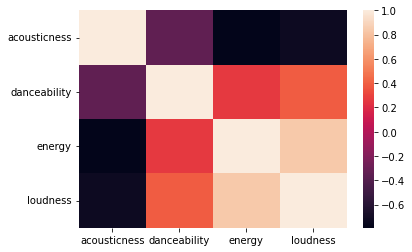

In [16]:
#Heatmap
sns.heatmap(data = music.corr())

In [17]:
#Barplot
music['music_genre'].value_counts()

Anime          4999
Rock           4998
Jazz           4997
Alternative    4997
Country        4997
Rap            4997
Blues          4997
Hip-Hop        4995
Classical      4992
Electronic     4986
Name: music_genre, dtype: int64

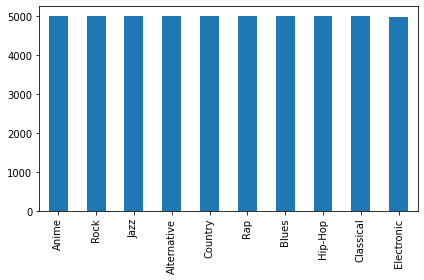

In [18]:
music['music_genre'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

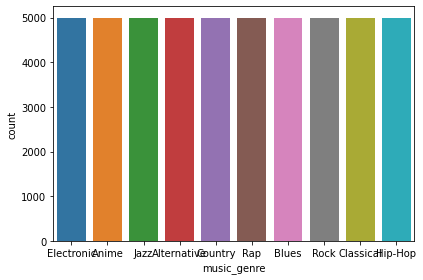

In [19]:
sns.countplot(data=music, x='music_genre')
plt.tight_layout()

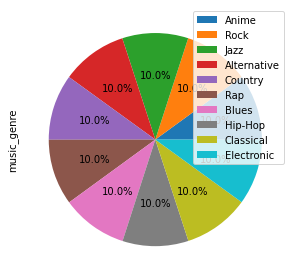

In [20]:
#Pie Chart
music['music_genre'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()


Line plot

Text(0.5, 1.0, 'energy')

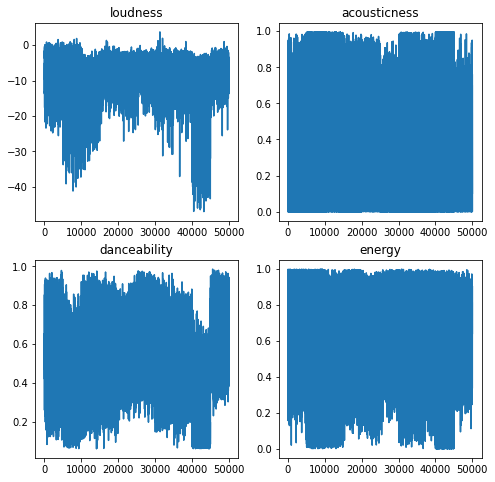

In [21]:

fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

music['loudness'].plot.line(ax=ax[0][0])
ax[0][0].set_title('loudness')
music['acousticness'].plot.line(ax=ax[0][1])
ax[0][1].set_title('acousticness')
music['danceability'].plot.line(ax=ax[1][0])
ax[1][0].set_title('danceability')
music['energy'].plot.line(ax=ax[1][1])
ax[1][1].set_title('energy')

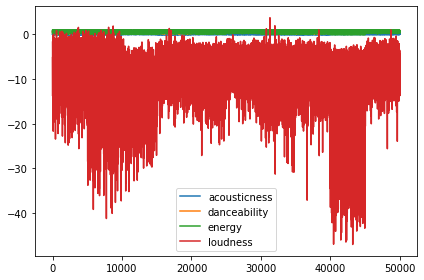

In [22]:
music.plot()
plt.tight_layout()

histogram

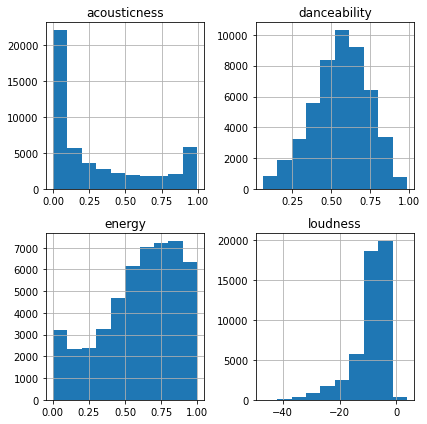

In [23]:
music.hist(figsize=(6,6), bins=10)
plt.tight_layout()

box plot

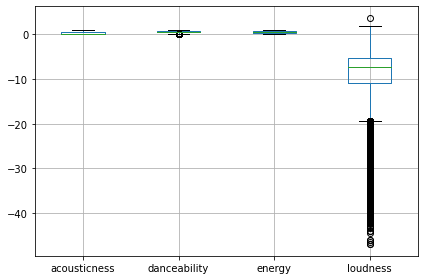

In [24]:
music.boxplot()
plt.tight_layout()

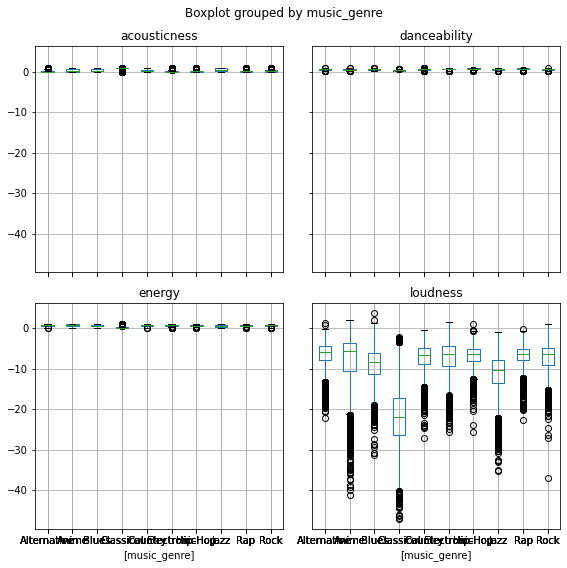

In [25]:
music.boxplot(by="music_genre", figsize=(8,8))
plt.tight_layout()

Scatter plot

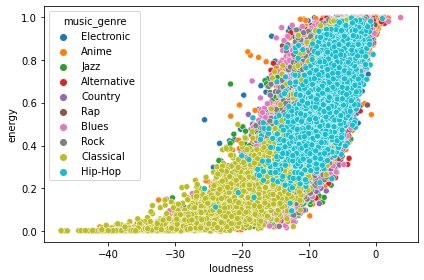

In [26]:
sns.scatterplot(x='loudness', y='energy', data=music, hue='music_genre')
plt.tight_layout()

pair plot

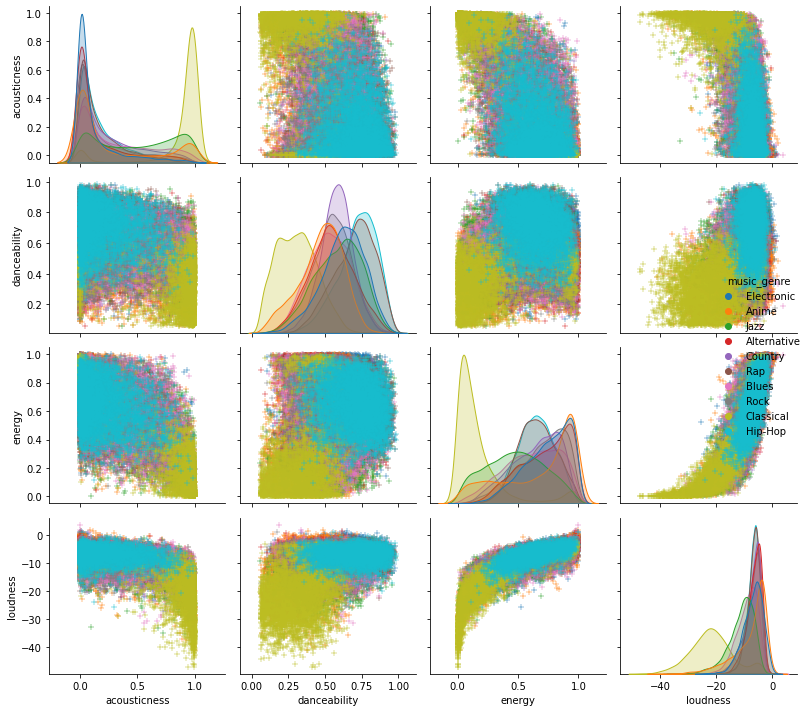

In [27]:
sns.pairplot(music, hue='music_genre', markers='+')
plt.tight_layout()

violin plot

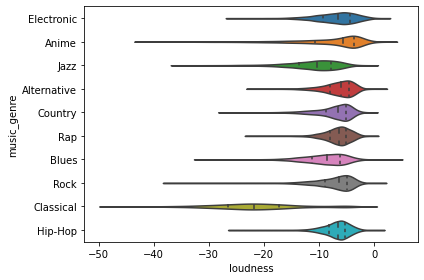

In [28]:
sns.violinplot(data=music, y='music_genre', x='loudness', inner='quartile')
plt.tight_layout()

**KLASIFIKASI DATA MENGGUNAKAN MODEL**

In [29]:
#Penentuan Fitur dan Kelas Label

X = music.drop(columns='music_genre')
X.head()

,acousticness,danceability,energy,loudness
0,0.00468,0.652,0.941,-5.201
1,0.01270,0.622,0.890,-7.043
2,0.00306,0.620,0.755,-4.617
3,0.02540,0.774,0.700,-4.498
4,0.00465,0.638,0.587,-6.266


In [30]:
y = music['music_genre']
y.head()

0    Electronic
1    Electronic
2    Electronic
3    Electronic
4    Electronic
Name: music_genre, dtype: object

In [31]:
#Pemisahan dataset ke data training dan data testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=30)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset
(29973, 4)
(29973,)

testing dataset:
(19982, 4)
(19982,)


**KLASIFIKASI MENGGUNAKAN MODEL K-NEAREST NEIGHBOR (KNN)**

In [32]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    y_pred = model_knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

In [33]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,y_train)
y_pred = model_knn.predict(X_test)

**KLASIFIKASI MENGGUNAKAN MODEL LOGISTIC REGRESSION**

**KLASIFIKASI MENGGUNAKAN MODEL SUPPORT VECTOR CLASSIFIER (SVC)**

In [34]:
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_test)

**KLASIFIKASI MENGGUNAKAN MODEL DECISION TREE**

In [35]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

**KLASIFIKASI MENGGUNAKAN MODEL RANDOM FOREST**

In [36]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

**KOMPARASI PERBANDINGAN AKURASI SETIAP MODEL**

In [37]:
models = [model_knn, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
print(accuracy_scores)

[0.24266840156140526, 0.29371434290861775, 0.22295065559003102, 0.2845060554499049]


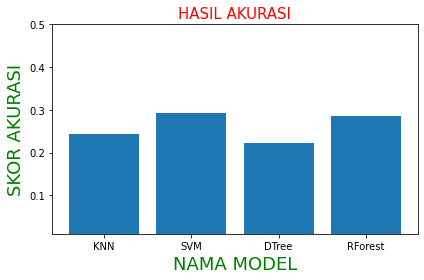

In [38]:
plt.bar(['KNN', 'SVM', 'DTree', 'RForest',], accuracy_scores)
plt.ylim (0.01, 0.50)
plt.title('HASIL AKURASI', fontsize=15, color='r')
plt.xlabel('NAMA MODEL', fontsize=18, color='g')
plt.ylabel('SKOR AKURASI', fontsize=18, color='g')
plt.tight_layout()
plt.show()